## Module 2 Worksheet - Chapter 4

The three checkpoints included in this worksheet need to be completed and marked during your lab session.

### Checkpoint 1 - Iris Classification

Replicate the supervised learning example shown in this week's lecture video to create a k-nearest neighbours (KNN) classifier model for the Iris dataset, that is able of predict the species of flower based on its sepal and petal size.
Verify that you are able to obtain a prediction accuracy of 90% for the same model seed (random_state=100) and number of neighbours (n_neighbors=3).

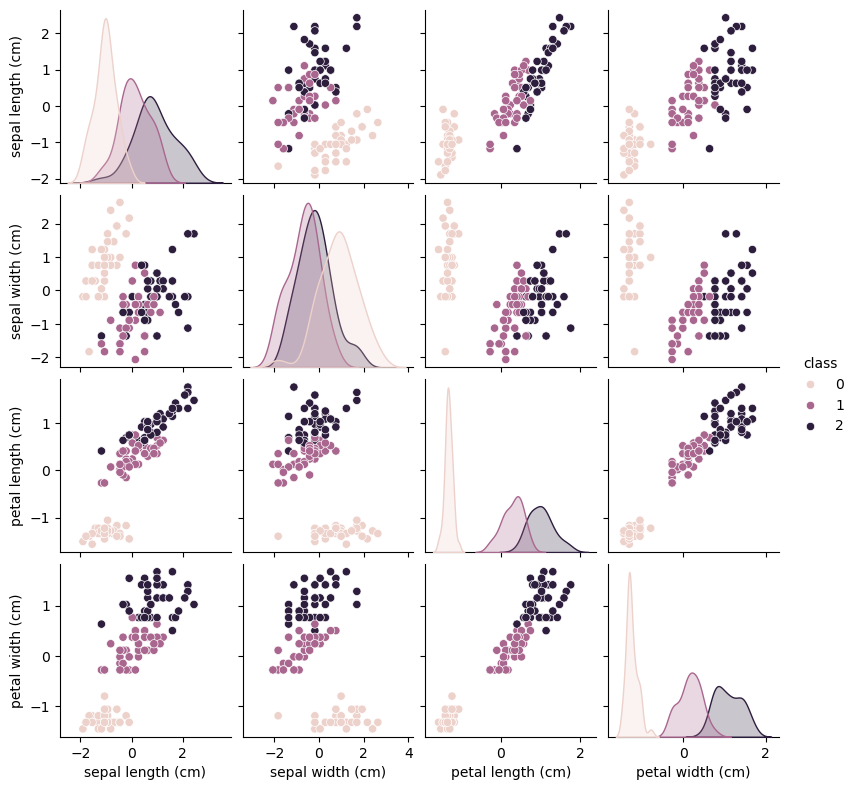

In [1]:
# Enter your code for Checkpoint 1 here
# Enter your code for Checkpoint 1 here
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import pandas as pd
import seaborn as sns

iris = datasets.load_iris()
type(iris)
# iris.keys()
# iris.data
# iris.feature_names
# iris.target
# iris.target_names
#print(iris.DESCR)

np.bincount(iris.target)

# Train and Test models
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state=100, stratify = iris.target)

np.bincount(y_test)


X_train_df = pd.DataFrame(X_train, columns = iris.feature_names)
X_train_df

y_train_df = pd.DataFrame(y_train, columns=['class'])
y_train_df

X_y_train_df = pd.concat([X_train_df, y_train_df], axis=1)
X_y_train_df

# Graphic Charts
#sns_plot = sns.pairplot(X_y_train_df, hue='class', height = 2)

mean = X_train.mean(axis=0)
mean

std = X_train.std(axis=0)
std

X_train_scaled = (X_train - mean) / std

# Mean = 0
X_train_scaled.mean(axis=0)

# Standardization
X_train_scaled.std(axis=0)


X_test_scaled = (X_test - mean) / std
X_test_scaled.mean(axis=0)


# Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = iris.feature_names)
X_y_train_df = pd.concat([X_train_scaled_df, y_train_df], axis=1)
sns_plot = sns.pairplot(X_y_train_df, hue='class', height = 2)


# K-nearest neighbor (KNN)
KNN_models = KNN(n_neighbors=3)
KNN_models.fit(X_train_scaled,y_train)
y_pred = KNN_models.predict(X_test_scaled)


In [2]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred) 
acc

0.9

### Checkpoint 2 - Digit Classification

Here we would like to work with another classification application. 
In this regard, we work with digits dataset that comes with scikit-learn. This is a dataset of 8×8 images of handwritten digits. 
More information including the sample size can be found at (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).

This dataset can be loaded from the datasets module in a similar fashion to the previous Iris dataset, but by calling <code>datasets.load_digits()</code> instead.

Check the number of instances in the loaded digits dataset, as well as the feature values and labels for each instance

Note, you may find that the number of features (dimensions) for each instance is too large to be displayed in full:
```
array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])
```

In this case, you can instead print the feature values for the first instance using <code>digits.data[0]</code>:
```
array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])
```

Each instance in this array represents a 8x8 greyscale image of a numerical digit, with the feature values for each instance indicating the shade strength for a specific pixel in this image (giving a total of 64 feature values)

We can visualise the greyscale pixel values for the first instance using the following code:

```python
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1, figsize=(1, 1), dpi=200)
axs.imshow(digits.data[0].reshape(8, 8), cmap='gray')
```

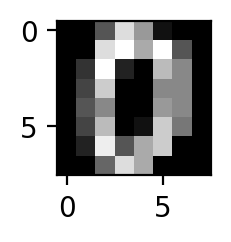


We can also visualise the first 50 digits using the following code:

```python
fig, axs = plt.subplots(5, 10, figsize=(8, 4), dpi=200)
for i, ax in enumerate(axs.ravel()):
    ax.imshow(digits.data[i].reshape(8, 8), cmap='gray')
```

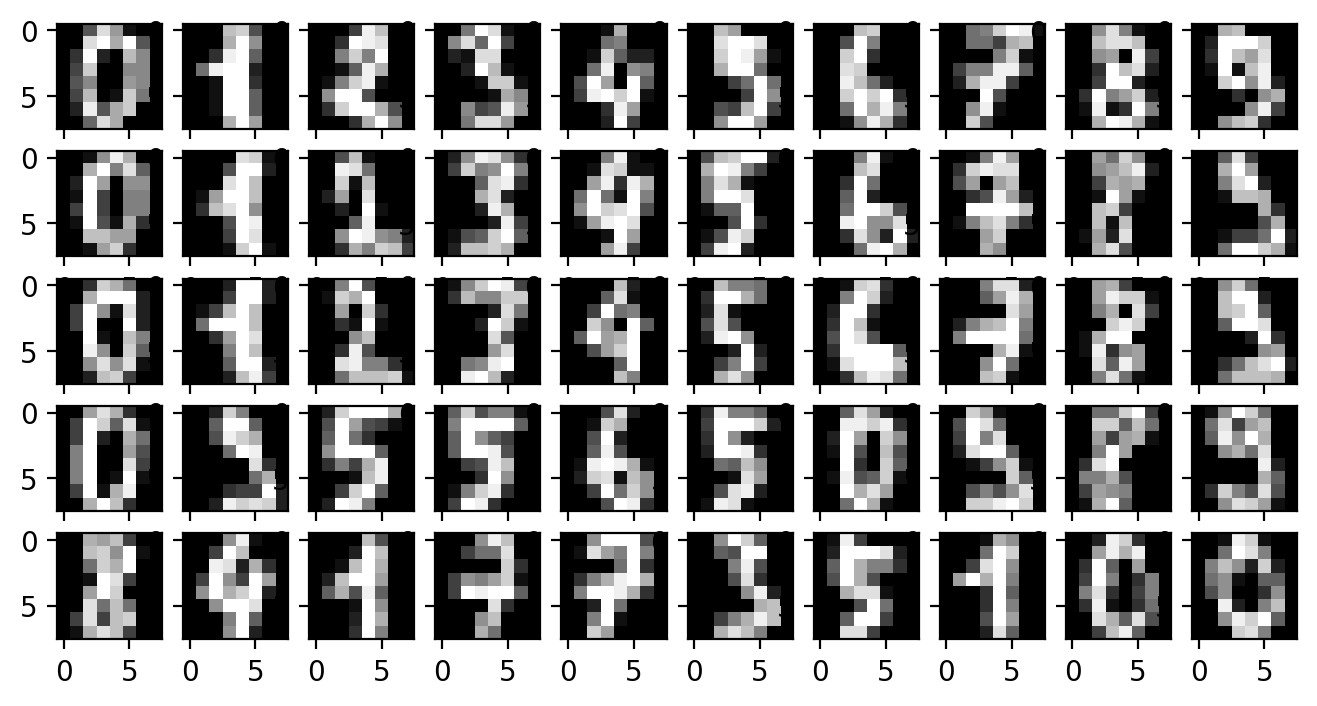


Print the labels (targets) for each of these 50 digits.
Notice that these labels correspond with the number that each instance (represented as a feature vector of greyscale values) visually resembles:

```
array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0])
```

Implement the train-test splitting with a test size of 0.25 (random_state=42), properly perform standardization and transformation of datasets, train a k-nearest neighbours classifier (k=3) on the training set, and report the accuracy on the test set.

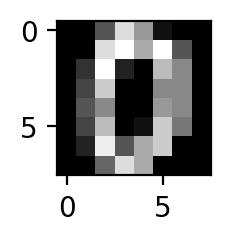

In [3]:
# Enter your code for Checkpoint 2 here
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

digits = datasets.load_digits()
fig, axs = plt.subplots(1, 1, figsize=(1, 1), dpi=200)
axs.imshow(digits.data[0].reshape(8, 8), cmap='gray')






In [4]:
# Train and Test models
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.25, random_state=42, stratify = digits.target)

np.bincount(y_test)

X_train_df = pd.DataFrame(X_train, columns = digits.feature_names)
X_train_df

y_train_df = pd.DataFrame(y_train, columns=['class'])
y_train_df

X_y_train_df = pd.concat([X_train_df, y_train_df], axis=1)
X_y_train_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,class
0,0.0,2.0,12.0,16.0,12.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,15.0,16.0,16.0,15.0,3.0,0.0,2
1,0.0,0.0,0.0,13.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,11.0,9.0,0.0,0.0,0.0,1
2,0.0,2.0,11.0,16.0,12.0,1.0,0.0,0.0,0.0,9.0,...,0.0,0.0,2.0,15.0,16.0,16.0,13.0,16.0,1.0,2
3,0.0,0.0,11.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,12.0,16.0,16.0,16.0,16.0,12.0,1
4,0.0,0.0,3.0,12.0,16.0,10.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,5.0,13.0,0.0,0.0,0.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,0.0,0.0,0.0,5.0,15.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,14.0,12.0,1.0,0.0,1
1343,0.0,0.0,2.0,12.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,13.0,15.0,9.0,0.0,0.0,0
1344,0.0,0.0,1.0,7.0,13.0,10.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,7.0,15.0,16.0,10.0,0.0,9
1345,0.0,0.0,3.0,14.0,13.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,13.0,15.0,7.0,0.0,0.0,8


In [5]:
# Graphic Charts
#sns_plot = sns.pairplot(X_y_train_df, hue='class', height = 2)


In [6]:
mean = X_train.mean(axis=0)
mean

std = X_train.std(axis=0)
std

X_train_scaled = (X_train - mean) / std

# Mean = 0
X_train_scaled.mean(axis=0)

# Standardization
X_train_scaled.std(axis=0)


X_test_scaled = (X_test - mean) / std
X_test_scaled.mean(axis=0)

C:\Users\mongk\AppData\Local\Temp\ipykernel_18100\2861017177.py:7: RuntimeWarning: invalid value encountered in divide
  X_train_scaled = (X_train - mean) / std
C:\Users\mongk\AppData\Local\Temp\ipykernel_18100\2861017177.py:16: RuntimeWarning: invalid value encountered in divide
  X_test_scaled = (X_test - mean) / std


array([            nan, -5.57405849e-03,  3.02144708e-02,  2.51219075e-02,
       -3.18429461e-03, -3.40351781e-02,  4.02884589e-02,  5.59046645e-02,
       -1.58672895e-02, -7.67494095e-03, -5.72345413e-02,  3.93810085e-02,
        1.93359151e-02, -1.10289772e-01,  2.35986122e-02,  4.14458462e-02,
        1.34579615e-01, -3.69396274e-02, -4.09793298e-02,  3.64243009e-02,
        2.39643171e-02, -4.13963288e-02,  5.02068060e-02,  9.81622135e-03,
        5.43322136e-02, -2.10439285e-02, -4.44122924e-02, -2.21909971e-02,
        2.40863228e-02,  2.55562553e-02,  2.59773404e-02, -1.04990131e-04,
                   nan,  1.38200335e-02,  3.25187773e-02, -2.33940264e-02,
       -4.10505799e-02,  4.41941983e-02,  2.41540184e-02,             nan,
        9.05399681e-02, -2.02488660e-02,  1.06485341e-03, -3.26104379e-02,
       -1.00802813e-02,  2.60434802e-02, -1.27817813e-02,  2.72088776e-02,
       -2.85481757e-02, -4.58899101e-02, -2.93899805e-02, -3.90112410e-02,
        1.45432922e-02,  

In [7]:
# Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = digits.feature_names)
X_y_train_df = pd.concat([X_train_scaled_df, y_train_df], axis=1)

In [8]:
# K-nearest neighbor (KNN)
KNN_models = KNN(n_neighbors=3)
KNN_models.fit(X_train_scaled,y_train)
y_pred = KNN_models.predict(X_test_scaled)

In [9]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred) 
acc

0.9666666666666667

### Checkpoint 3 - Customer Classification

Working with clients and understanding the factors that can improve the business is part of marketing data science. One goal in marketing data science is to keep customers (customer retention), which could be easier in some aspects than attracting new customers. In this exercise, we see a case study on customer retention.

A highly competitive market is communication services. Following the break-up of AT&T in 80’s, customers had a choice to keep their carrier (AT&T) or move to another carrier. AT&T tried to identify factors relating to customer choice of carriers. For this purpose, they collected customer data from a number of sources including phone interviews, household billing, and service information recorded in their databases. The dataset that we use here is based on this effort and includes nine feature variables and a label (pick). The goal is to construct a classifier that predicts customers who switch to another service provider or stay with AT&T.

---

Most datasets that you will need to analyse are not provided to you directly by a Python library, and are instead often stored within an external database or .csv (comma separated value) file.
Download the "att.csv" file provided on FLO and copy it to the same location as this jupyter notebook.
Import the information contained within this csv into a pandas dataframe object and display the first 10 rows using the following code:

```python
import pandas as pd
df = pd.read_csv('att.csv')
df.head(n=10)
```

If successful, you should see the following output:

```
|     | pick   | income   | moves   | age   | education   | employment   |   usage | nonpub   | reachout   | card   |
|----:|:-------|:---------|:--------|:------|:------------|:-------------|--------:|:---------|:-----------|:-------|
|   0 | OCC    | <7.5     | 0       | 35-44 | HS          | F            |       9 | YES      | NO         | NO     |
|   1 | ATT    | 45-75    | 2       | 25-34 | HS          | F            |       2 | YES      | NO         | NO     |
|   2 | OCC    | NaN      | 0       | NaN   | NaN         | NaN          |       6 | NO       | NO         | YES    |
|   3 | OCC    | NaN      | 2       | 65+   | <HS         | R            |       7 | NO       | NO         | NO     |
|   4 | OCC    | NaN      | 0       | 65+   | HS          | H            |       0 | NO       | NO         | NO     |
|   5 | OCC    | NaN      | 0       | 65+   | NaN         | NaN          |       0 | NO       | NO         | NO     |
|   6 | OCC    | 25-35    | 0       | 45-54 | <HS         | F            |       3 | NO       | NO         | NO     |
|   7 | OCC    | 15-25    | 0       | 55-64 | HS          | R            |       1 | NO       | NO         | YES    |
|   8 | OCC    | NaN      | 0       | 55-64 | <HS         | F            |       0 | NO       | NO         | NO     |
|   9 | OCC    | 25-35    | 0       | 45-54 | <HS         | H            |       2 | NO       | NO         | NO     |
```

Below is a description of the variables in the dataset:
- **pick:** customer choice (AT&T or OCC [short for Other Common Carrier])
- **income:** household income in thousands of dollars
- **moves:** number of times the household moved in the last five years
- **age:** age of respondent in years (18-24, 25-34, 35-44, 45-54, 55-64, 65+)
- **education:** <HS (less than high school); HS (high school graduate); Voc (vocational school); Coll (Some College); BA (college graduate); >BA (graduate school) 
- **employment:** D (disabled); F (full-time); P (part-time); H (homemaker); R (retired); S (student); U (unemployed)
- **usage:** average phone usage per month
- **nonpub:** does the household have an unlisted phone number
- **reachout:** does the household participate in the AT&T “Reach Out America” phone service plan?
- **card**: does the household have an “AT&T Calling Card”?

---

Let's start by removing some of the columns from our dataset. In a real-world situation, we may remove (aka. drop) features for a variety of reasons (irrelevance to task, low accuracy/reliability in reported value, a large number of missing values, etc.). Use the following code to drop the specified column indices from our dataset:

```python
drop_ind=df.columns[[1,2,3,4,7]]
df_reduced = df.drop(drop_ind, axis=1)
df_reduced.head(n=10)
```

---

As mentioned above, a common problem when applying machine learning to sourced datasets is missing values. In this case, looking at the first 10 customers we can see that some of them have missing values for income, age, education and employment (listed as "NaN"). We can also get the missing rate for each feature across the whole dataset with the following call <code>df.isnull().sum()/df.shape[0]</code>

While there are several ways to handle missing dataset values, the simplest solution is just to drop any instances with a NaN value:

```python
df_reduced_no_miss = df_reduced.dropna()
```

Print the number of instances (customers) in this new dataset, and verify that all NaN values have been removed.

---

We then need to split the dataset into our labels ("pick" column) and input features (everything but the pick column):

```python
y = df_reduced_no_miss.pick
X = df_reduced_no_miss.drop('pick', axis=1)
```

Implement train-test splitting with a test size of 0.2 (random_state=100), to produce the following four variables (X_train, X_test, y_train, y_test)

---

Another common issue when applying machine learning to sourced datasets is the presence of categorical feature values. In the previous Iris and Digit datasets this was not a problem, as all of the input feature values were numeric. Many machine learning algorithms are based on the assumption that all features have numeric values, and will not work otherwise. 
For example, in the k-nearest neighbours algorithm we need to calculate the distance between instances (feature vectors), but this is only possible if the values within our feature vectors are numerical (e.g., we know that the feature vector [4.5, 6.7, 1.4] is closer to [4.7, 7.1, 1.8] than it is to [9.3, 1.1, 2.9]). However, this comparison is not possible if we have categorical feature values.
To rectify this issue, we often need to transform categorical features into numerical ones, a process known as **encoding**.

There are various strategies for encoding with different pros and cons. An efficient strategy in this regard is ordinal encoding. In this strategy, a variable with N categories, will be converted to a numeric variable with integers from 0 to N − 1.

Use the following code to create encoded versions of our input features:

```python
from sklearn.preprocessing import OrdinalEncoder
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()
ordinal_encoder = OrdinalEncoder()
X_train_encoded[["employment","reachout","card"]] = ordinal_encoder.fit_transform(X_train[["employment","reachout","card"]])
X_test_encoded[["employment","reachout","card"]] = ordinal_encoder.transform(X_test[["employment","reachout","card"]])
print(X_train_encoded)
print(X_test_encoded)
print(ordinal_encoder.categories_)
```

Please take note of the following points:
- We first created copies of the X_train and X_test datasets, so that we can still access both the original unencoded values and the new encoded values.
- We only encode the columns that are categorical ("usage" is already numeric)
- we call the fit_transform method on the training dataset to both fit the encoder and transform the values, and we only call the transform method on the testing dataset.

We also need to encode the labels for each instance, which is done using the LabelEncoder. This works similarly to OrdinalEncoder except that it accepts one-dimensional arrays and Series.

```python
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
```

---

Using our newly encoded features and labels, use a MinMaxScaler to normalize and transform the dataset, train a k-nearest neighbours classifier (k=7) on the training set, and report the accuracy on the test set.

In [10]:
# Enter your code for Checkpoint 3 here

from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('att.csv')
df.head(n=10)

,pick,income,moves,age,education,employment,usage,nonpub,reachout,card
0,OCC,<7.5,0,35-44,HS,F,9,YES,NO,NO
1,ATT,45-75,2,25-34,HS,F,2,YES,NO,NO
2,OCC,NaN,0,NaN,NaN,NaN,6,NO,NO,YES
3,OCC,NaN,2,65+,<HS,R,7,NO,NO,NO
4,OCC,NaN,0,65+,HS,H,0,NO,NO,NO
5,OCC,NaN,0,65+,NaN,NaN,0,NO,NO,NO
6,OCC,25-35,0,45-54,<HS,F,3,NO,NO,NO
7,OCC,15-25,0,55-64,HS,R,1,NO,NO,YES
8,OCC,NaN,0,55-64,<HS,F,0,NO,NO,NO
9,OCC,25-35,0,45-54,<HS,H,2,NO,NO,NO


In [12]:
drop_ind=df.columns[[1,2,3,4,7]]
df_reduced = df.drop(drop_ind, axis=1)
df_reduced.head(n=10)

,pick,employment,usage,reachout,card
0,OCC,F,9,NO,NO
1,ATT,F,2,NO,NO
2,OCC,NaN,6,NO,YES
3,OCC,R,7,NO,NO
4,OCC,H,0,NO,NO
5,OCC,NaN,0,NO,NO
6,OCC,F,3,NO,NO
7,OCC,R,1,NO,YES
8,OCC,F,0,NO,NO
9,OCC,H,2,NO,NO


In [23]:
df_reduced_no_miss = df_reduced.dropna()
print("Number of instances after dropping missing values:", len(df_reduced_no_miss))

print(df_reduced_no_miss.head(n=10))

# Verify no NaNs remain
print(df_reduced_no_miss.isnull().sum())  

Number of instances after dropping missing values: 955
   pick employment  usage reachout card
0   OCC          F      9       NO   NO
1   ATT          F      2       NO   NO
3   OCC          R      7       NO   NO
4   OCC          H      0       NO   NO
6   OCC          F      3       NO   NO
7   OCC          R      1       NO  YES
8   OCC          F      0       NO   NO
9   OCC          H      2       NO   NO
10  ATT          F      0       NO   NO
11  ATT          F      5       NO   NO
pick          0
employment    0
usage         0
reachout      0
card          0
dtype: int64


In [15]:
y = df_reduced_no_miss.pick
X = df_reduced_no_miss.drop('pick', axis=1)

In [16]:
from sklearn.model_selection import train_test_split

# Split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [17]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [24]:
encoded_cols = ["employment", "reachout", "card"]
ordinal_encoder = OrdinalEncoder()

X_train_encoded = X_train.copy()
print(X_train_encoded)
X_test_encoded = X_test.copy()
print(X_test_encoded)
ordinal_encoder = OrdinalEncoder()
X_train_encoded[["employment","reachout","card"]] = ordinal_encoder.fit_transform(X_train[["employment","reachout","card"]])
X_test_encoded[["employment","reachout","card"]] = ordinal_encoder.transform(X_test[["employment","reachout","card"]])
print(X_train_encoded)
print(X_test_encoded)
print(ordinal_encoder.categories_)

    employment  usage reachout card
588          D     40       NO   NO
13           F      0       NO   NO
947          F      4       NO   NO
852          R      3       NO   NO
370          F     22       NO  YES
..         ...    ...      ...  ...
890          H     24      YES  YES
908          F      0       NO   NO
867          F     15      YES   NO
824          R      2       NO  YES
541          R     11       NO   NO

[764 rows x 4 columns]
    employment  usage reachout card
878          R      8       NO   NO
468          R     27       NO  YES
225          F      1       NO  YES
394          F      2       NO   NO
605          F     58       NO   NO
..         ...    ...      ...  ...
191          R      2       NO   NO
108          P      0       NO   NO
105          F     30       NO  YES
502          F      3       NO   NO
207          R      1       NO   NO

[191 rows x 4 columns]
     employment  usage  reachout  card
588         0.0     40       0.0   0.0
13        

In [26]:
from sklearn.preprocessing import LabelEncoder
# Transform string labels to numericial 
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
print(y_train_encoded)
print(y_test_encoded)


[1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0
 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1
 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0
 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0
 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1
 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1
 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0
 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0
 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0
 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0
 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1
 1 0 0 1 0 1 1 0 1 1 0 1 

In [27]:
from sklearn.preprocessing import MinMaxScaler

# Using normalise and transform datasets
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Train datasets by using K-nearest
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train_scaled, y_train_encoded)
y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test_encoded, y_pred)
print("ACC:", accuracy)


ACC: 0.5863874345549738
